# The Hello World of Deep Learning with Tensorflow

## Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [42]:
# Finding access to GPUs
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## What is a Tensor?

Tensors are `multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.DType.

If you're familiar with NumPy, tensors are (kind of) like np.arrays.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

In [2]:
# Create a scalar (rank 0 tensor)
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# Check the details of a tensor (ndim stands for number of dimensions)
scalar.ndim, scalar.dtype, scalar.numpy()

(0, tf.int32, 7)

#### A scalar is known as a rank 0 tensor. Because it has no dimensions (it's just a number).

In [5]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [6]:
# Check the details of a vector (ndim stands for number of dimensions)
vector.ndim, vector.dtype, vector.numpy()

(1, tf.int32, array([10, 10]))

In [7]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [8]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(2,
 tf.int32,
 array([[10,  7],
        [ 7, 10]]))

In [9]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [10]:
# Check the details of a vector (ndim stands for number of dimensions)
tensor.ndim, tensor.dtype, tensor.numpy()

(3,
 tf.int32,
 array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18]]]))

#### Creating Tensors with tf.Variable()
You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using **tf.Variable().**

The difference between **tf.Variable()** and **tf.constant()** is tensors created with **tf.constant()** are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with **tf.Variable()** are mutable (can be changed).

In [11]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [12]:
# Will error (requires the .assign() method)
# changeable_tensor[0] = 7
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

### Creating Radom Tensors

In [13]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution 
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Other ways to make Tensors

In [14]:
# Make a tensor of all ones
tf.ones(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [15]:
# Make a tensor of all zeros
tf.zeros(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

**Turn NumPy arrays in into tensors.**

In [16]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
A = tf.constant(numpy_A,  
                shape=[2, 4, 3]) # note: the shape total (2*4*3) has to match the number of elements in the array
numpy_A, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]])>)

**Getting information from tensors (shape, rank, size)**

In [17]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [18]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


### Manipulating tensors (tensor operations)
#### Basic operations
You can perform many of the basic mathematical operations directly on tensors using Pyhton operators such as, +, -, *.

In [19]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
print(tensor)
print(tensor + 10)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[20 17]
 [13 14]], shape=(2, 2), dtype=int32)


In [20]:
# Multiplication (known as element-wise multiplication)
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [21]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]])>

In [22]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

#### Matrix mutliplication
One of the most common operations in machine learning algorithms is matrix multiplication.

TensorFlow implements this matrix multiplication functionality in the **tf.matmul()** method.

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:
- (3, 5) @ (3, 5) won't work
- (5, 3) @ (3, 5) will work
- (3, 5) @ (5, 3) will work


The resulting matrix has the shape of the outer dimensions:
- (5, 3) @ (3, 5) -> (5, 5)
- (3, 5) @ (5, 3) -> (3, 3)


**Note: '@' in Python is the symbol for matrix multiplication.**

In [23]:
# Matrix multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [24]:
# Matrix multiplication with Python operator '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

### The dot product
Multiplying matrices by each other is also referred to as the dot product.

You can perform the **tf.matmul()** operation using **tf.tensordot()**.

In [25]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [26]:
# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

* [`tf.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape) - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
* [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose) - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the [`perm` parameter](https://www.tensorflow.org/api_docs/python/tf/transpose).

### Changing the datatype of a tensor

In [27]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7])>)

In [28]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [29]:
# Change from int32 to float32
C = tf.cast(C, dtype=tf.float32)
C

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 7.], dtype=float32)>

### Getting the absolute value

In [30]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D, tf.abs(D)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10])>)

### Finding the min, max, mean, sum (aggregation)

To do so, aggregation methods typically have the syntax `reduce()_[action]`, such as:
* [`tf.reduce_min()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_min) - find the minimum value in a tensor.
* [`tf.reduce_max()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_max) - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
* [`tf.reduce_mean()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) - find the mean of all elements in a tensor.
* [`tf.reduce_sum()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum) - find the sum of all elements in a tensor.

In [31]:
# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([62, 32, 66, 61, 42, 50, 63, 85, 89, 37, 68, 18, 37, 95, 41, 66, 58,
       42, 79, 89, 70, 27, 20, 43, 48, 38, 19,  1,  3, 89,  7, 76, 82,  1,
       95, 77, 78,  0,  5, 27,  6, 91, 22, 36, 57,  6, 56,  1, 76, 41])>

In [32]:
tf.reduce_min(E), tf.reduce_max(E), tf.reduce_mean(E), tf.reduce_mean(E), tf.reduce_sum(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=95>,
 <tf.Tensor: shape=(), dtype=int32, numpy=47>,
 <tf.Tensor: shape=(), dtype=int32, numpy=47>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2378>)

In [33]:
# tf.argmax() - find the position of the maximum element in a given tensor.
# tf.argmin() - find the position of the minimum element in a given tensor.

tf.argmax(E), tf.argmin(E)

(<tf.Tensor: shape=(), dtype=int64, numpy=13>,
 <tf.Tensor: shape=(), dtype=int64, numpy=37>)

### Squeezing a tensor (removing all single dimensions)

In [34]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [35]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

### One-hot encoding

If you have a tensor of indicies and would like to one-hot encode it, you can use [`tf.one_hot()`](https://www.tensorflow.org/api_docs/python/tf/one_hot).

You should also specify the `depth` parameter (the level which you want to one-hot encode to).

In [36]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# One hot encode them
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

### Squaring, log, square root

Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:
* [`tf.square()`](https://www.tensorflow.org/api_docs/python/tf/math/square) - get the square of every value in a tensor. 
* [`tf.sqrt()`](https://www.tensorflow.org/api_docs/python/tf/math/sqrt) - get the squareroot of every value in a tensor (**note:** the elements need to be floats or this will error).
* [`tf.math.log()`](https://www.tensorflow.org/api_docs/python/tf/math/log) - get the natural log of every value in a tensor (elements need to floats).

### Manipulating `tf.Variable` tensors

Tensors created with `tf.Variable()` can be changed in place using methods such as:

* [`.assign()`](https://www.tensorflow.org/api_docs/python/tf/Variable#assign) - assign a different value to a particular index of a variable tensor.
* [`.add_assign()`](https://www.tensorflow.org/api_docs/python/tf/Variable#assign_add) - add to an existing value and reassign it at a particular index of a variable tensor.


## Tensors and NumPy

We've seen some examples of tensors interact with NumPy arrays, such as, using NumPy arrays to create tensors. 

Tensors can also be converted to NumPy arrays using:

* `np.array()` - pass a tensor to convert to an ndarray (NumPy's main datatype).
* `tensor.numpy()` - call on a tensor to convert to an ndarray.

Doing this is helpful as it makes tensors iterable as well as allows us to use any of NumPy's methods on them.

In [37]:
# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [38]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [39]:
# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

## Using `@tf.function`

In your TensorFlow adventures, you might come across Python functions which have the decorator [`@tf.function`](https://www.tensorflow.org/api_docs/python/tf/function).

If you aren't sure what Python decorators do, [read RealPython's guide on them](https://realpython.com/primer-on-python-decorators/).

But in short, decorators modify a function in one way or another.

In the `@tf.function` decorator case, it turns a Python function into a callable TensorFlow graph. Which is a fancy way of saying, if you've written your own Python function, and you decorate it with `@tf.function`, when you export your code (to potentially run on another device), TensorFlow will attempt to convert it into a fast(er) version of itself (by making it part of a computation graph).

For more on this, read the [Better performnace with tf.function](https://www.tensorflow.org/guide/function) guide.

In [40]:
# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x, y)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [41]:
# Create the same function and decorate it with tf.function
@tf.function
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

## Define and Compile the Neural Network
Steps:
- Build
- Compile
- Fit
- Evaluate

**Simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.**

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=["mae"])
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)
history = model.fit(xs, ys, epochs=10)
print(model.predict([7.0]))

Epoch 1/10
1/1 [==============================] - 0s 461ms/step - loss: 81.1202 - mae: 8.1882
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 37.5449 - mae: 5.5699
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 17.3769 - mae: 3.7885
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 8.0426 - mae: 2.5767
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 3.7224 - mae: 1.7523
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.7228 - mae: 1.1914
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7974 - mae: 0.8098
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.3691 - mae: 0.5502
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.1708 - mae: 0.3736
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0791 - mae: 0.2535
[[3.6553903]]


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### What is an Epoch?
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

## Improving a model
To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model**
    - Add more layers
    - Increase the number of hidden units (also called neurons) within each layer
    - Change the activation functions of each layer.
2. **Compiling a model** 
    - Choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** 
    - Fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [52]:
# Plots Training Data and Prediction data.
def plot_predictions(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels, 
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

In [53]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Simple Classsification Model

In [54]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

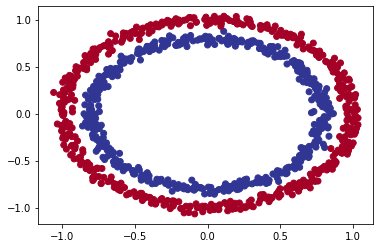

In [55]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                # optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [57]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.


In [58]:
# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
# Fit the model (passing the lr_scheduler callback)
# history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

In [60]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
# y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

### Multi Image Classification Fashion Mnist

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
# history = model_11.fit(train_data,train_labels, epochs=10, validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

**Ploting History Data**

In [62]:
import pandas as pd
# Plot non-normalized data loss curves
# pd.DataFrame(history.history).plot(title=" Data")

## CNN

In [65]:
import zipfile

# Download zip file of pizza_steak images
import wget
wget.download('https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip')

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

100% [......................................................................] 109579078 / 109579078

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 273ms/step - loss: 0.5606 - accuracy: 0.7233 - val_loss: 0.3862 - val_accuracy: 0.8520
Epoch 2/5
47/47 [==============================] - 4s 77ms/step - loss: 0.4293 - accuracy: 0.8000 - val_loss: 0.3620 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 4s 80ms/step - loss: 0.3964 - accuracy: 0.8347 - val_loss: 0.3344 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 4s 85ms/step - loss: 0.3641 - accuracy: 0.8427 - val_loss: 0.3651 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 4s 80ms/step - loss: 0.3713 - accuracy: 0.8313 - val_loss: 0.3351 - val_accuracy: 0.8580


In [67]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [68]:
# For Data Augumentation

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

#### Add an extra axis
tf.expand_dims(object, axis=0) # add an extra dimension at axis 0

### Use TensorFlow Datasets to Download Data

In [70]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds
# Load in the data (takes about 5-6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             data_dir = "D:\Datasets\FoodBlog",
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)

In [71]:
# Features of Food101 TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [72]:
# Get class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Batch & prepare datasets

Before we can model our data, we have to turn it into batches.

Why?

Because computing on batches is memory efficient.
Specifically, we're going to be using:

* [`map()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) - maps a predefined function to a target dataset (e.g. `preprocess_img()` to our image tensors)
* [`shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) - randomly shuffles the elements of a target dataset up `buffer_size` (ideally, the `buffer_size` is equal to the size of the dataset, however, this may have implications on memory)
* [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) - turns elements of a target dataset into batches (size defined by parameter `batch_size`)
* [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) - prepares subsequent batches of data whilst other batches of data are being computed on (improves data loading speed but costs memory)
* Extra: [`cache()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) - caches (saves them for later) elements in a target dataset, saving loading time (will only work if your dataset is small enough to fit in memory, standard Colab instances only have 12GB of memory) 

In [74]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes image to
  [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [75]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [76]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

## Create modelling callbacks

Since we're going to be training on a large amount of data and training could take a long time, it's a good idea to set up some modelling callbacks so we be sure of things like our model's training logs being tracked and our model being checkpointed (saved) after various training milestones.

To do each of these we'll use the following callbacks:
* [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - allows us to keep track of our model's training history so we can inspect it later (**note:** we've created this callback before have imported it from `helper_functions.py` as `create_tensorboard_callback()`)
* [`tf.keras.callbacks.ModelCheckpoint()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - saves our model's progress at various intervals so we can load it and resuse it later without having to retrain it
  * Checkpointing is also helpful so we can start fine-tuning our model at a particular epoch and revert back to a previous state if fine-tuning offers no benefits

In [78]:
# Create TensorBoard callback (already have "create_tensorboard_callback()" from a previous notebook)
# from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved 

In [79]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision 

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


In [80]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [82]:
# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data, 
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[
                                                                model_checkpoint])

Epoch 1/3
2368/2368 [==============================] - 106s 41ms/step - loss: 1.8175 - accuracy: 0.5582 - val_loss: 1.2292 - val_accuracy: 0.6761
Epoch 2/3
2368/2368 [==============================] - 99s 41ms/step - loss: 1.2922 - accuracy: 0.6661 - val_loss: 1.1236 - val_accuracy: 0.6976
Epoch 3/3
2368/2368 [==============================] - 99s 41ms/step - loss: 1.1427 - accuracy: 0.7026 - val_loss: 1.0843 - val_accuracy: 0.7079


## NLP

In [89]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import wget
wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')


 15% [...........                                                               ]  851968 / 5643545

100% [..........................................................................] 5643545 / 5643545

'sarcasm.json'

In [90]:
# Preprocessing Data

with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [91]:
#Setting Variables

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

import numpy as np

training_sentences = np.array(sentences[0:training_size])
testing_sentences = np.array(sentences[training_size:])
training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])


In [92]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
#Creating Word Tokenizer

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Creating Sequences out of Tokens and Padding them

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


#### Creating Simple LSTM NLP Model

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [95]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 24)                1560      
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [96]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


Epoch 1/5
625/625 [==============================] - 18s 24ms/step - loss: 0.4566 - accuracy: 0.7719 - val_loss: 0.3890 - val_accuracy: 0.8225
Epoch 2/5
625/625 [==============================] - 13s 21ms/step - loss: 0.3555 - accuracy: 0.8363 - val_loss: 0.3917 - val_accuracy: 0.8183
Epoch 3/5
625/625 [==============================] - 14s 22ms/step - loss: 0.3333 - accuracy: 0.8483 - val_loss: 0.3719 - val_accuracy: 0.8332
Epoch 4/5
625/625 [==============================] - 13s 21ms/step - loss: 0.3146 - accuracy: 0.8594 - val_loss: 0.3718 - val_accuracy: 0.8326
Epoch 5/5
625/625 [==============================] - 13s 21ms/step - loss: 0.3012 - accuracy: 0.8672 - val_loss: 0.3728 - val_accuracy: 0.8334


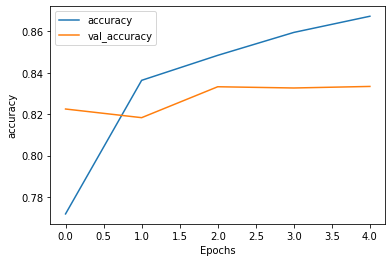

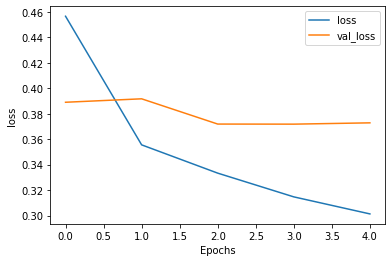

In [97]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [98]:
# Replacing bidirectional LSTM layer with conv1d

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_10 (Dense)            (None, 24)                3096      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
__________________________________________________

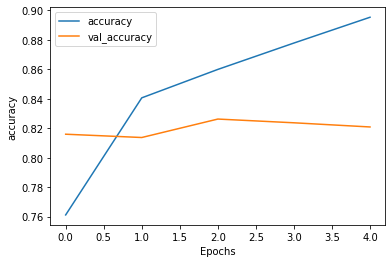

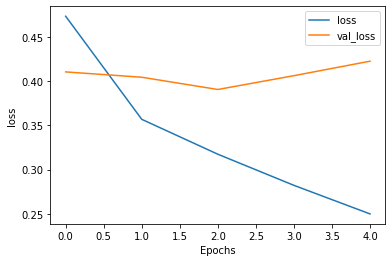

In [99]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

**Using Conv1D is significantly faster than LSTM while still gives similar result.**

## Time Series Forcasting using LSTM

In [100]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [101]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [102]:
# Running Model for 100 epochs 

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

E:\InstallationDir\Anaconda\envs\ml-ai\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
31/31 [==============================] - 7s 20ms/step - loss: 21.5740 - mae: 22.0689 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 13ms/step - loss: 21.2347 - mae: 21.7274 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 13ms/step - loss: 20.8067 - mae: 21.2998 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 13ms/step - loss: 20.3562 - mae: 20.8486 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 13ms/step - loss: 19.8797 - mae: 20.3748 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 13ms/step - loss: 19.3012 - mae: 19.7940 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 13ms/step - loss: 18.4252 - mae: 18.9169 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 13ms/step - loss: 17.5520 - mae: 18.0443 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 13ms/step - loss: 17.2153 - mae:

Epoch 73/100
31/31 [==============================] - 0s 13ms/step - loss: 6.6024 - mae: 7.0884 - lr: 3.9811e-05
Epoch 74/100
31/31 [==============================] - 0s 13ms/step - loss: 5.5135 - mae: 5.9902 - lr: 4.4668e-05
Epoch 75/100
31/31 [==============================] - 0s 13ms/step - loss: 5.2305 - mae: 5.7097 - lr: 5.0119e-05
Epoch 76/100
31/31 [==============================] - 0s 13ms/step - loss: 5.7212 - mae: 6.2038 - lr: 5.6234e-05
Epoch 77/100
31/31 [==============================] - 0s 13ms/step - loss: 5.6191 - mae: 6.1003 - lr: 6.3096e-05
Epoch 78/100
31/31 [==============================] - 0s 13ms/step - loss: 5.2257 - mae: 5.7050 - lr: 7.0795e-05
Epoch 79/100
31/31 [==============================] - 0s 14ms/step - loss: 5.7309 - mae: 6.2113 - lr: 7.9433e-05
Epoch 80/100
31/31 [==============================] - 0s 13ms/step - loss: 5.5978 - mae: 6.0818 - lr: 8.9125e-05
Epoch 81/100
31/31 [==============================] - 0s 13ms/step - loss: 6.3844 - mae: 6.8713 

In [104]:
### To make series to Window

# 0 1 2 3 4 
# 1 2 3 4 5 
# 2 3 4 5 6 
# 3 4 5 6 7 
# 4 5 6 7 8 
# 5 6 7 8 9 

# ---------------
# dataset = tf.data.Dataset.range(10)
# dataset = dataset.window(5, shift=1, drop_remainder=True)
# for window_dataset in dataset:
#   for val in window_dataset:
#     print(val.numpy(), end=" ")
    
# --------------

# dataset = tf.data.Dataset.range(10)
# dataset = dataset.window(5, shift=1, drop_remainder=True)
# dataset = dataset.flat_map(lambda window: window.batch(5))
# dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
# for x,y in dataset:
#   print(x.numpy(), y.numpy())
  
# [0 1 2 3] [4]
# [1 2 3 4] [5]
# [2 3 4 5] [6]
# [3 4 5 6] [7]
# [4 5 6 7] [8]
# [5 6 7 8] [9]

# ----------

In [105]:

# To expand the dimensions of the layer
#  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
 

In [112]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [113]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [114]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [115]:
series = tf.range(1,100)
series = series.numpy()
series

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [117]:
windows, labels = make_windows(series)
windows, labels

(array([[ 1,  2,  3,  4,  5,  6,  7],
        [ 2,  3,  4,  5,  6,  7,  8],
        [ 3,  4,  5,  6,  7,  8,  9],
        [ 4,  5,  6,  7,  8,  9, 10],
        [ 5,  6,  7,  8,  9, 10, 11],
        [ 6,  7,  8,  9, 10, 11, 12],
        [ 7,  8,  9, 10, 11, 12, 13],
        [ 8,  9, 10, 11, 12, 13, 14],
        [ 9, 10, 11, 12, 13, 14, 15],
        [10, 11, 12, 13, 14, 15, 16],
        [11, 12, 13, 14, 15, 16, 17],
        [12, 13, 14, 15, 16, 17, 18],
        [13, 14, 15, 16, 17, 18, 19],
        [14, 15, 16, 17, 18, 19, 20],
        [15, 16, 17, 18, 19, 20, 21],
        [16, 17, 18, 19, 20, 21, 22],
        [17, 18, 19, 20, 21, 22, 23],
        [18, 19, 20, 21, 22, 23, 24],
        [19, 20, 21, 22, 23, 24, 25],
        [20, 21, 22, 23, 24, 25, 26],
        [21, 22, 23, 24, 25, 26, 27],
        [22, 23, 24, 25, 26, 27, 28],
        [23, 24, 25, 26, 27, 28, 29],
        [24, 25, 26, 27, 28, 29, 30],
        [25, 26, 27, 28, 29, 30, 31],
        [26, 27, 28, 29, 30, 31, 32],
        [27,

In [119]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(73, 19, 73, 19)